<a href="https://colab.research.google.com/github/shreyashrestha07/Projects/blob/main/CUS_620_Project_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CUS-620 Project 🐍
### Name: Shreya Shrestha
### Topic: 2k20 NBA Player Analysis

- Data Set Source : Kaggle (csv file)
- Link to Dataset : [link](https://www.kaggle.com/isaienkov/nba2k20-player-dataset)

--------------

#### Understanding the project and data: 📊
`The dataset consist data of 429 ditinct players and 14 attributes that describes each player`


### Project GOALS:
- Create a program that analyzes the dataset and provide insights on player's performance and background
- Build a user interactive program that will take input values from the user and perform the functions accordingly

### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns


### Importing the dataset as data frame (df)

In [ ]:
df = pd.read_csv('nba2k20-full.csv') #to read the csv file


In [ ]:
df.head(10) #to see the first 10 rows


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas


### Columns of the data set 

In [ ]:
df.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college'],
      dtype='object')

### Data Pre-Processing

- Step 1: Check for missing values
- Step 2: Ensure all the attributes are in a correct data type
- Step 3: Split the attribute Weight/Height into lbs/cm respectively
- Step 4: Derive a new attribute Age from the date of birth attribute


#### Checking the missing values (null)

In [ ]:
df.isna().sum() # checking total missing values for each attributes 

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

#### Checking the records with missing values in the column Team and filling in as 'Team Unknown'

In [ ]:
df[df['team'].isna()] #to check the players that do no belong to any team

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
33,DeMarcus Cousins,86,#0,NaN,C,08/13/90,6-10 / 2.08,270 lbs. / 122.5 kg.,$3500000,USA,2010,1,5,Kentucky
168,Michael Beasley,76,#0,NaN,F,01/09/89,6-10 / 2.08,235 lbs. / 106.6 kg.,$3500000,USA,2008,1,2,Kansas State
177,Gerald Green,76,#0,NaN,F-G,01/26/86,6-6 / 1.98,192 lbs. / 87.1 kg.,$2564753,USA,2005,1,18,NaN
198,Isaiah Thomas,76,#0,NaN,G,02/07/89,5-9 / 1.75,185 lbs. / 83.9 kg.,$2320044,USA,2011,2,60,Washington
203,Pau Gasol,75,#0,NaN,C,07/06/80,7-1 / 2.16,250 lbs. / 113.4 kg.,$5538540,Spain,2001,1,3,NaN
237,Allonzo Trier,75,#0,NaN,G-F,01/17/96,6-4 / 1.93,200 lbs. / 90.7 kg.,$3551100,USA,2018,Undrafted,Undrafted,Arizona
264,Chandler Parsons,74,#0,NaN,F,10/25/88,6-9 / 2.06,200 lbs. / 90.7 kg.,$25102512,USA,2011,2,38,Florida
266,Ivan Rabb,74,#0,NaN,F-C,02/04/97,6-10 / 2.08,220 lbs. / 99.8 kg.,$451326,USA,2017,2,35,California
283,Allen Crabbe,73,#0,NaN,G-F,04/09/92,6-5 / 1.96,197 lbs. / 89.4 kg.,$17818456,USA,2013,2,31,California
294,CJ Miles,73,#0,NaN,G-F,03/18/87,6-6 / 1.98,232 lbs. / 105.2 kg.,$8730158,USA,2005,2,34,NaN


In [ ]:
df['team'] = df['team'].fillna('Team Unknown') # filling in the missing values with 'Team Unknown'

#### Checking the missing values in column College and filling in with 'College Unknown'

In [ ]:
df[df['college'].isna()] #to check the players that do no belong to any college

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
11,Nikola Jokic,90,#15,Denver Nuggets,C,02/19/95,7-0 / 2.13,253 lbs. / 114.8 kg.,$27504630,Serbia,2014,2,41,NaN
16,Rudy Gobert,88,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$25258427,France,2013,1,27,NaN
20,Luka Doncic,87,#77,Dallas Mavericks,G-F,02/28/99,6-7 / 2.01,227 lbs. / 103 kg.,$7683360,Slovenia,2018,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Darius Bazley,70,#7,Oklahoma City Thunder,F,06/12/00,6-8 / 2.03,200 lbs. / 90.7 kg.,$2284800,USA,2019,1,23,NaN
405,Thanasis Antetokounmpo,70,#43,Milwaukee Bucks,F,07/18/92,6-6 / 1.98,215 lbs. / 97.5 kg.,$1445697,Greece,2014,2,51,NaN
421,Isaac Bonga,68,#17,Washington Wizards,G,11/08/99,6-8 / 2.03,200 lbs. / 90.7 kg.,$1416852,Germany,2018,2,39,NaN
422,Isaiah Hartenstein,68,#0,Team Unknown,F-C,05/05/98,7-0 / 2.13,250 lbs. / 113.4 kg.,$1416852,Germany,2017,2,43,NaN


In [ ]:
df['college'] = df['college'].fillna('College Unknown') # filling in the missing values with 'College Unknown'


In [ ]:
df.isna().sum()  # checking to ensure to null values are handled


full_name      0
rating         0
jersey         0
team           0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
college        0
dtype: int64

### Check the data types

In [ ]:
df.dtypes #to see the data types of the attributes


full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
dtype: object

#### Convert Salary data type to int64(integer)

In [ ]:
df['salary'] = df['salary'].str.replace('$', '') #to replace the '$' from salary
df['salary'] = df['salary'].str.replace(',','')
df['salary'] = df['salary'].astype(np.int64) #to change the data type


#### Split the column Weight, separated by measurements i.e. lbs/kgs, and keep the lbs values only

In [ ]:
weight = df['weight'].str.split('/',expand=True) #to split the value
weight = weight.drop([1], axis=1) # droping the kg values
weight.columns = ['weight_lbs'] #naming the attribute
df = pd.concat([df, weight], axis=1) #to join
df = df.drop(['weight'], axis=1) #dropping the original attribute
df['weight_lbs'] = df['weight_lbs'].str.replace('lbs.', '') #to replace the 'lbs' from the value
df['weight_lbs'] = df['weight_lbs'].astype(np.int64) #to change the data type


#### Split the column Height, separated by measurements i.e. foot/meter, and changes the values to cm

In [ ]:
height = df['height'].str.split('/',expand=True) #to split the value
height = height.drop([0], axis=1) #to drop the height in ft values
height.columns = ['height_cm'] #naming the attribute
height['height_cm'] = height['height_cm'].astype(np.float64) #to change the data type
height['height_cm'] = height*100 #to convert m to cm
df = pd.concat([df, height], axis=1) #to join
df = df.drop(['height'], axis=1) # to drop the original height value from the dataframe


In [ ]:
df.head() # we can now see weight in lbs and height in cm in out dataframe.


,full_name,rating,jersey,team,position,b_day,salary,country,draft_year,draft_round,draft_peak,college,weight_lbs,height_cm
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,37436858,USA,2003,1,1,College Unknown,250,206.0
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,32742000,USA,2011,1,15,San Diego State,225,201.0
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,25842697,Greece,2013,1,15,College Unknown,242,211.0
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,37199000,USA,2007,1,2,Texas,230,208.0
4,James Harden,96,#13,Houston Rockets,G,08/26/89,38199000,USA,2009,1,3,Arizona State,220,196.0


#### Derive a new column Age, from the date of birth values

In [ ]:
def from_date_to_age(date):
    'Derive a new column Age, from the date of birth values'
    born=datetime.datetime.strptime(date, '%m/%d/%y')
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df["age"]=df["b_day"].apply(lambda x: from_date_to_age(x))

In [ ]:
df.dtypes

full_name       object
rating           int64
jersey          object
team            object
position        object
b_day           object
salary           int64
country         object
draft_year       int64
draft_round     object
draft_peak      object
college         object
weight_lbs       int64
height_cm      float64
age              int64
dtype: object

### Summary statistics of all the numeric attributes

In [ ]:
def sumstats():
    'Calculates the summary statistics of the numeric attributes of the Dataset'
    stats_of_df = df.describe().transpose()
    return stats_of_df
sumstats()


,count,mean,std,min,25%,50%,75%,max
rating,429.0,7.637296e+01,5.657748e+00,67.0,72.0,75.0,79.0,97.0
salary,429.0,8.530080e+06,9.218059e+06,50000.0,2000000.0,4380120.0,12200000.0,40231758.0
draft_year,429.0,2.014093e+03,3.937678e+00,2001.0,2012.0,2015.0,2017.0,2019.0
weight_lbs,429.0,2.143240e+02,2.322603e+01,170.0,197.0,213.0,230.0,290.0
height_cm,429.0,1.995641e+02,8.351435e+00,175.0,193.0,201.0,206.0,224.0
age,429.0,2.678089e+01,4.106469e+00,19.0,24.0,26.0,30.0,40.0


### Group by function: Average Player Salary of the Teams

In [ ]:
def avgSalaryofTeams():
    'Average salary of the teams'
    avgSal = df.groupby('team')['salary'].mean().round(2) #round the avg salary to 2 decimal points
    return avgSal
avgSalaryofTeams()


team
Atlanta Hawks              6367084.00
Boston Celtics             8335849.00
Brooklyn Nets              9774913.64
Charlotte Hornets          9325961.10
Chicago Bulls              7496184.33
Cleveland Cavaliers        9901506.92
Dallas Mavericks           8844797.53
Denver Nuggets             9937247.15
Detroit Pistons            7407295.93
Golden State Warriors     14347339.00
Houston Rockets           10317469.08
Indiana Pacers             7514208.27
Los Angeles Clippers      10774057.29
Los Angeles Lakers         8535837.47
Memphis Grizzlies          7515854.69
Miami Heat                10438351.00
Milwaukee Bucks            8241299.06
Minnesota Timberwolves     8664911.23
New Orleans Pelicans       7835069.73
New York Knicks            6671532.87
Oklahoma City Thunder     10021747.92
Orlando Magic              8442993.33
Philadelphia 76ers         9215469.07
Phoenix Suns               6269284.81
Portland Trail Blazers    10671061.25
Sacramento Kings           8045426.64
San Ant

#### A function that counts the number of players in a team

In [ ]:
def members_of_team(tcount):
    'function that counts the number of players in a team'
    members = {}
    for i in tcount:
        if i in members:
            members[i]= members[i]+1
        else:
            members[i]=1
    for team in members:
        if members[team] == 1:
            print('{:25} has {:2} player'.format(team, members[team]))
        else:
            print('{:22} has {:2} players'.format(team, members[team]))
            
        

In [ ]:
a = list(df['team'])
a.sort()
members_of_team(a) #calling the function


Atlanta Hawks          has 12 players
Boston Celtics         has 14 players
Brooklyn Nets          has 14 players
Charlotte Hornets      has 10 players
Chicago Bulls          has 15 players
Cleveland Cavaliers    has 12 players
Dallas Mavericks       has 15 players
Denver Nuggets         has 13 players
Detroit Pistons        has 14 players
Golden State Warriors  has  9 players
Houston Rockets        has 13 players
Indiana Pacers         has 15 players
Los Angeles Clippers   has 14 players
Los Angeles Lakers     has 15 players
Memphis Grizzlies      has 13 players
Miami Heat             has 12 players
Milwaukee Bucks        has 17 players
Minnesota Timberwolves has 13 players
New Orleans Pelicans   has 15 players
New York Knicks        has 15 players
Oklahoma City Thunder  has 13 players
Orlando Magic          has 15 players
Philadelphia 76ers     has 14 players
Phoenix Suns           has 16 players
Portland Trail Blazers has 12 players
Sacramento Kings       has 14 players
San Antonio 

### Team with the highest number of players in it

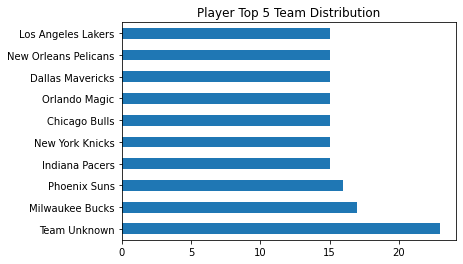

In [ ]:
df['team'].value_counts()[:10].plot(kind='barh') #counting the number of players from top 5 country
plt.title('Player Top 5 Team Distribution')
plt.show()


#### Correlation between numeric attributes of the Dataframe

In [ ]:
def correlations():
    'this functions shows the correlations between numeric attributes of the Dataframe'
    corrAtt = df.corr('pearson')
    return corrAtt
correlations()


,rating,salary,draft_year,weight_lbs,height_cm,age
rating,1.000000,0.775239,-0.391595,0.120446,0.089489,0.268915
salary,0.775239,1.000000,-0.512727,0.052419,0.039176,0.427032
draft_year,-0.391595,-0.512727,1.000000,-0.066626,-0.018157,-0.918288
weight_lbs,0.120446,0.052419,-0.066626,1.000000,0.733486,0.041191
height_cm,0.089489,0.039176,-0.018157,0.733486,1.000000,-0.026500
age,0.268915,0.427032,-0.918288,0.041191,-0.026500,1.000000


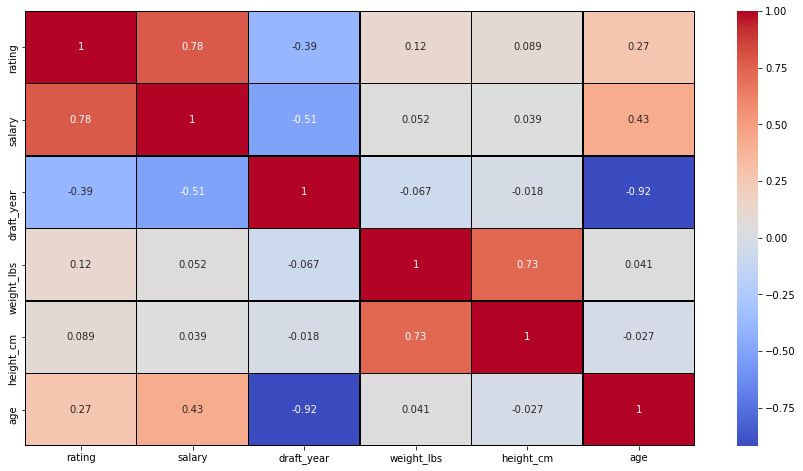

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='coolwarm')
plt.show()

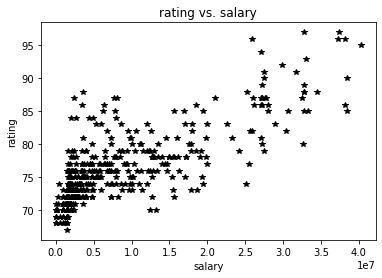

In [ ]:
plt.plot(df['salary'], df['rating'], '*', color = 'black')

plt.title('rating vs. salary')
plt.xlabel('salary')
plt.ylabel('rating')
plt.show()

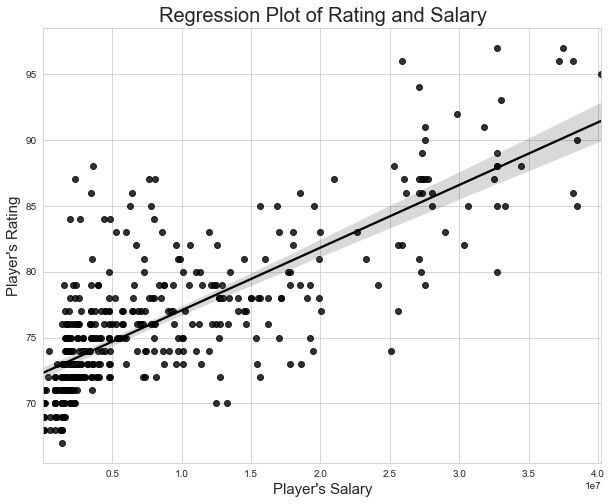

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")

regPlot = sns.regplot(x='salary', y='rating', data=df, color='black')
regPlot.set_title("Regression Plot of Rating and Salary", fontsize=20)
regPlot.set_xlabel("Player's Salary", fontsize=15)
regPlot.set_ylabel("Player's Rating", fontsize=15)

plt.show()

## Summary statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,429.0,7.637296e+01,5.657748e+00,67.0,72.0,75.0,79.0,97.0
salary,429.0,8.530080e+06,9.218059e+06,50000.0,2000000.0,4380120.0,12200000.0,40231758.0
draft_year,429.0,2.014093e+03,3.937678e+00,2001.0,2012.0,2015.0,2017.0,2019.0
weight_lbs,429.0,2.143240e+02,2.322603e+01,170.0,197.0,213.0,230.0,290.0
height_cm,429.0,1.995641e+02,8.351435e+00,175.0,193.0,201.0,206.0,224.0
age,429.0,2.678089e+01,4.106469e+00,19.0,24.0,26.0,30.0,40.0


## Data Analysis and Vizualizations using Matplotlib

### Top five highest paid players

In [ ]:
def highPaid():
    'Shows the top five highest paid players'
    hightest_paid_players = df.sort_values(by = ['salary'], ascending=False).head(5)
    return hightest_paid_players[['full_name','salary']]
highPaid()


,full_name,salary
5,Stephen Curry,40231758
48,Chris Paul,38506482
12,Russell Westbrook,38506482
38,John Wall,38199000
4,James Harden,38199000


### Who is the most expensive player?

In [ ]:
def MEP():
    'The most expensive player'
    MEP = df[df['salary'] == df['salary'].max()].full_name.values[0]
    salary = df['salary'].max()
    print(MEP, 'is the most expensive player and he earns' , salary , 'per year' )
    
MEP()


Stephen Curry is the most expensive player and he earns 40231758 per year


### Who is the least expensive player? 

In [ ]:
def LEP():
    'The least expensive player'
    LEP = df[df['salary'] == df['salary'].min()].full_name.values[0]
    salary = df['salary'].min()
    print(LEP, 'is the least expensive and he earns' , salary, 'per year' )
    
LEP()


Tyler Lydon is the least expensive and he earns 50000 per year


### Top 5 highest rated players

In [ ]:
def highRate():
    'Shows the top five highest rated players'
    hightest_rated_players = df.sort_values(by = ['rating'], ascending=False).head(5)
    return hightest_rated_players[['full_name','rating']]
highRate()



,full_name,rating
0,LeBron James,97
1,Kawhi Leonard,97
2,Giannis Antetokounmpo,96
3,Kevin Durant,96
4,James Harden,96


### 5 strongest teams based on the average rating of the player

In [ ]:
def StrongTeam():
    'Showes the 5 strongest NBA team based on the average rating of the players in the team'
    StrongestTeam = df.groupby('team')['rating'].mean().round(2).sort_values(ascending = False).head()
    return StrongestTeam
StrongTeam()


team
Los Angeles Clippers     79.29
Golden State Warriors    79.11
Brooklyn Nets            78.71
Utah Jazz                78.33
Los Angeles Lakers       77.80
Name: rating, dtype: float64

### Player’s salary distribution across all teams 

[Text(0, 0, 'Los Angeles Lakers'),
 Text(0, 0, 'Los Angeles Clippers'),
 Text(0, 0, 'Milwaukee Bucks'),
 Text(0, 0, 'Brooklyn Nets'),
 Text(0, 0, 'Houston Rockets'),
 Text(0, 0, 'Golden State Warriors'),
 Text(0, 0, 'Portland Trail Blazers'),
 Text(0, 0, 'Philadelphia 76ers'),
 Text(0, 0, 'Denver Nuggets'),
 Text(0, 0, 'Minnesota Timberwolves'),
 Text(0, 0, 'Miami Heat'),
 Text(0, 0, 'Utah Jazz'),
 Text(0, 0, 'Detroit Pistons'),
 Text(0, 0, 'Boston Celtics'),
 Text(0, 0, 'Dallas Mavericks'),
 Text(0, 0, 'San Antonio Spurs'),
 Text(0, 0, 'Washington Wizards'),
 Text(0, 0, 'Indiana Pacers'),
 Text(0, 0, 'Toronto Raptors'),
 Text(0, 0, 'Sacramento Kings'),
 Text(0, 0, 'Phoenix Suns'),
 Text(0, 0, 'Team Unknown'),
 Text(0, 0, 'Cleveland Cavaliers'),
 Text(0, 0, 'New Orleans Pelicans'),
 Text(0, 0, 'Orlando Magic'),
 Text(0, 0, 'Atlanta Hawks'),
 Text(0, 0, 'Chicago Bulls'),
 Text(0, 0, 'Oklahoma City Thunder'),
 Text(0, 0, 'New York Knicks'),
 Text(0, 0, 'Memphis Grizzlies'),
 Text(0, 0, '

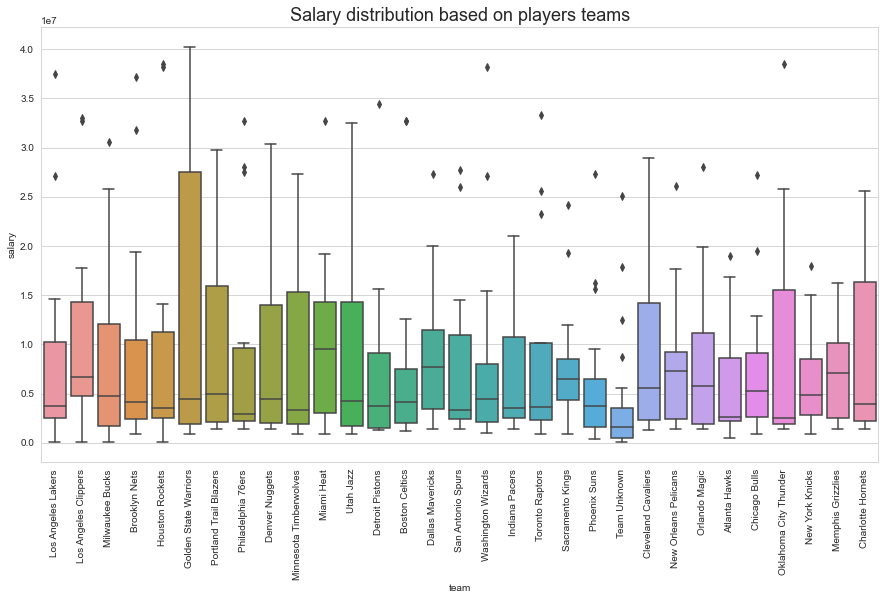

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Salary distribution based on players teams", fontsize=18)
x = sns.boxplot(x="team", y="salary", data=df)
x.set_xticklabels(x.get_xticklabels(), rotation=90)

### Lowest and Highest rating present in the dataset

In [ ]:
def mostLeast():
    'Lowest and Highest rating present in the dataset'
    highest = df[df['rating'] == df['rating'].max()].full_name.values[0]
    high = df['rating'].max()
    lowest = df[df['rating'] == df['rating'].min()].full_name.values[0]
    low = df['rating'].min()
    print(lowest, 'is the lowest rated player presented in dataset. ', 'His rating is -', low)
    print(highest, 'is the highest rated player presented in dataset. ', 'His rating is -', high)
mostLeast()


Duncan Robinson is the lowest rated player presented in dataset.  His rating is - 67
LeBron James is the highest rated player presented in dataset.  His rating is - 97


### Team grouped by rating

In [ ]:
def teamRate():
    'Team grouped by their rating'
    teamRating = df[['team','rating']].groupby('team').sum().sort_values(by='rating', ascending=False)
    return teamRating
teamRate()


,rating
team,
Team Unknown,1673
Milwaukee Bucks,1299
Phoenix Suns,1200
Los Angeles Lakers,1167
Dallas Mavericks,1153
New Orleans Pelicans,1146
Indiana Pacers,1144
Chicago Bulls,1136
Orlando Magic,1134


### Position distribution

In [ ]:
df['position'].value_counts()


G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

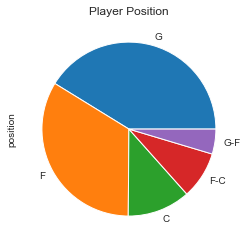

In [ ]:
df['position'].value_counts()[:5].plot(kind='pie') #counting the number of players from top 5 country
plt.title('Player Position')
plt.show()


- G (Guard) is the most common player position

### 5 Colleges whose graduates have the highest salary

In [ ]:
avgSalByCol = df.groupby('college')['salary'].mean()
topCol = avgSalByCol.sort_values(ascending=False).head()
print(topCol)


college
Davidson           40231758.0
Arizona State      38199000.0
San Diego State    32742000.0
Butler             32700690.0
Louisiana Tech     30350000.0
Name: salary, dtype: float64


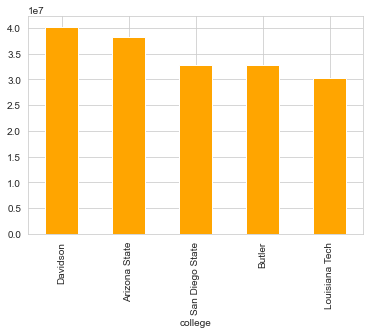

In [ ]:
avgSalByCol.sort_values(ascending=False)[:5].plot(kind='bar', color = 'orange')
plt.show()


### Player's Country Count

In [ ]:
def country_count(count):
    'Counts the number of players by country'
    country = {} 
    for player in count:
        if player in country:
            country[player]= country[player]+1
        else:
            country[player]=1
    for players in country:
        if country[players] == 1:
            print('There is {:2} player from {:10}'.format(country[players] ,players))
        else:
            print('There are {:1} players from {:12}'.format(country[players] ,players))
            

In [ ]:
c = list(df['country'])
c.sort()
country_count(c)

There is  1 player from Angola    
There are 9 players from Australia   
There is  1 player from Austria   
There are 2 players from Bosnia and Herzegovina
There are 2 players from Brazil      
There are 2 players from Cameroon    
There are 15 players from Canada      
There are 6 players from Croatia     
There is  1 player from Czech     
There are 2 players from Democratic Republic of the Congo
There is  1 player from Dominican Republic
There is  1 player from Egypt     
There is  1 player from Finland   
There are 8 players from France      
There is  1 player from Georgia   
There are 6 players from Germany     
There are 3 players from Greece      
There is  1 player from Haiti     
There is  1 player from Israel    
There are 4 players from Italy       
There is  1 player from Japan     
There are 3 players from Latvia      
There are 2 players from Lithuania   
There is  1 player from Mali      
There is  1 player from Montenegro
There is  1 player from New Zealand
There are 3

#### Top 5 Country Distribution

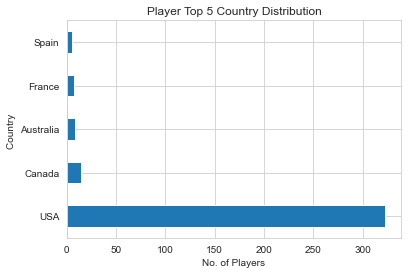

In [ ]:
df['country'].value_counts()[:5].plot(kind='barh') #counting the number of players from top 5 country
plt.title('Player Top 5 Country Distribution')
plt.xlabel('No. of Players')
plt.ylabel('Country ')
plt.show()


`Most of the players are from USA`

`Top 5 countries by count of players:`

- USA
- Canada
- Australia
- France
- Germany

#### Plotting the top 5 jersey numbers

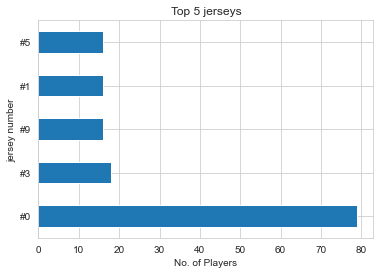

In [ ]:
df['jersey'].value_counts()[:5].plot(kind='barh') #counting the number of players from top 10 teams
plt.title('Top 5 jerseys')
plt.xlabel('No. of Players')
plt.ylabel('jersey number')
plt.show()


`#0 is the most common jersey number`

### Who is the tallest player?

In [ ]:
def tallest():
    'The tallest player in the dataset'
    tallPlayer = df[df['height_cm'] == df['height_cm'].max()].full_name.values[0] 
    height = df['height_cm'].max()
    print ('The tallest player is', tallPlayer, ',he is' , height, 'cms')
tallest()

The tallest player is Boban Marjanovic ,he is 224.00000000000003 cms


### Who is the shortest player?

In [ ]:
def shortest():
    'The shortest player in the dataset'
    shortPlayer = df[df['height_cm'] == df['height_cm'].min()].full_name.values[0] 
    height = df['height_cm'].min()
    print ('The shortest player is', shortPlayer, ',he is' , height, 'cms')
shortest()

The shortest player is Isaiah Thomas ,he is 175.0 cms


### Who is the heaviest player?

In [ ]:
def heavy():
    'The heaviest player in the dataset'
    heavyPlayer = df[df['weight_lbs'] == df['weight_lbs'].max()].full_name.values[0] 
    weight = df['weight_lbs'].max()
    print ('The heaviest player is', heavyPlayer, ',he is' , weight, 'lbs')
heavy()

The heaviest player is Jusuf Nurkic ,he is 290 lbs


### Age distribution

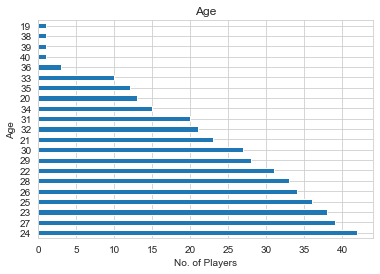

In [ ]:
df['age'].value_counts()[:].plot(kind='barh') 
plt.title('Age')
plt.xlabel('No. of Players')
plt.ylabel('Age')
plt.show()

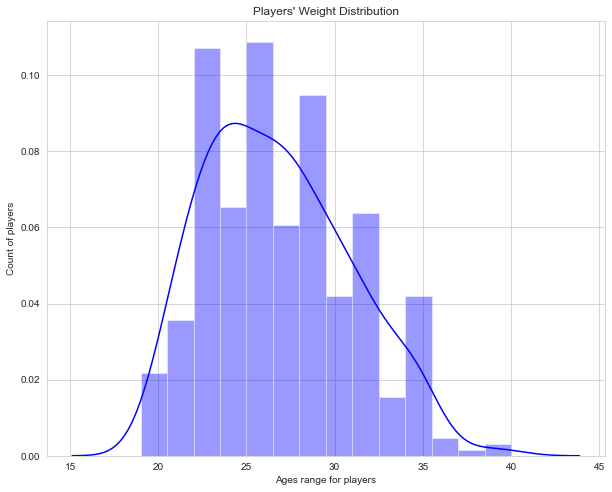

Pau Gasol is the oldest nba player and is (40 years old)
Sekou Doumbouya is the youngest nba players and is (19 years old)


In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.distplot(df['age'], color = 'blue')
plt.xlabel('Ages range for players')
plt.ylabel('Count of players')
plt.title('Players\' Weight Distribution')
plt.xticks()
plt.show()
print(f"{df[df.age == df.age.max()].full_name.values[0]} is the oldest nba player and is ({df.age.max()} years old)")
print(f"{df[df.age == df.age.min()].full_name.values[0]} is the youngest nba players and is ({df.age.min()} years old)")

### Salary distribution based on player position

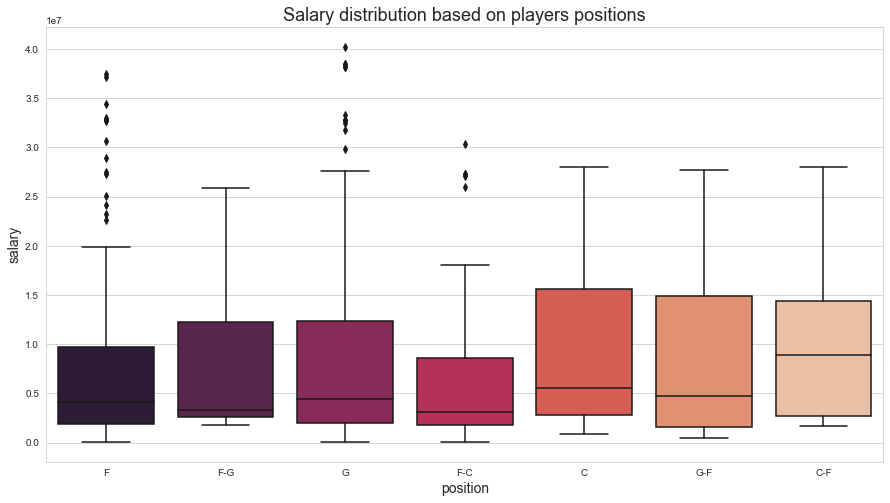

In [ ]:
plt.figure(figsize=(15, 8))
plt.xlabel("Position", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.title("Salary distribution based on players positions", fontsize=18)
sns.boxplot(x="position", y="salary", data=df, palette="rocket");

### Height distribution based on player position

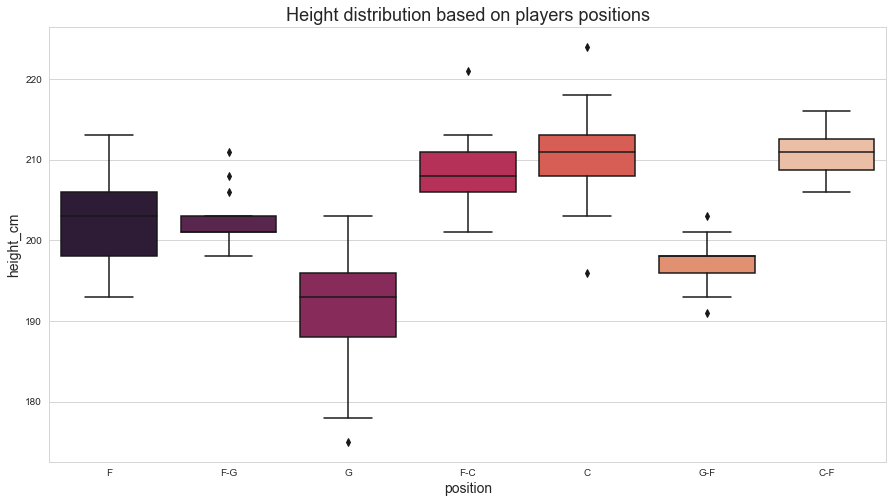

In [ ]:
plt.figure(figsize=(15, 8))
plt.xlabel("Position", fontsize=14)
plt.ylabel("Height", fontsize=14)
plt.title("Height distribution based on players positions", fontsize=18)
sns.boxplot(x="position", y="height_cm", data=df, palette="rocket");

# *******USER INTERACTIVE PROGRAM: PLEASE TRY THIS*******

### Welcome message
Prints a welcome message at the begaining of the program:

In [ ]:
def welcome_1():
    print('='*55)
    print('WELCOME TO THE NBA 2K20 PLAYER ANALYSIS')
    print('='*55)
    print('')

    user_fname = input('Enter your first name: ')
    user_lname = input('Enter your last name: ')

    print('')
    print('='*55)
    print('Hello',user_fname.upper(), user_lname.upper()+',', 'let\'s start the analysis!')

welcome_1()

WELCOME TO THE NBA 2K20 PLAYER ANALYSIS

Enter your first name: faze
Enter your last name: k

Hello FAZE K, let's start the analysis!


### Input user's favorite team from the data set

In [ ]:
print('We have the following NBA teams included in our data set: \n')   
team_list = list(set(df['team']))    #list out the distinct teams in the dataset
team_list.remove('Team Unknown')     #remove the unknown values from the list
team_list.sort()

counter = 1  #use the variable counter to store the counting number to print
for i in team_list:    #iterating over the distinct team values
    print('{:2}'.format(counter),':',i)       #print all the distinct team along with a counting id
    counter = counter + 1
    
print()    #to create a blank line
    
while True:
    user_favorite_team_num = input('Which one is your favorite team? (enter the number next to the team name): ')
    
    if not(user_favorite_team_num.isdigit()):          #using the method .isdigit() to check if the input is digit
        print('**ERROR: Please enter a valid integer**')
        continue       
        
    else:      #check if the input is not within the listed range i.e. number of distinct team
        if not(int(user_favorite_team_num) > 0 and int(user_favorite_team_num) <= len(team_list)):
            print('**ERROR: Please enter a valid number within the range specified (1-30)**')
            continue
    
    user_input_team_num = int(user_favorite_team_num)-1
    user_favorite_team = team_list[user_input_team_num]
    print('')
    print('That\'s Awesome! We will look in more details for',user_favorite_team.upper(),'as we progress.')
    break


We have the following NBA teams included in our data set: 

 1 : Atlanta Hawks
 2 : Boston Celtics
 3 : Brooklyn Nets
 4 : Charlotte Hornets
 5 : Chicago Bulls
 6 : Cleveland Cavaliers
 7 : Dallas Mavericks
 8 : Denver Nuggets
 9 : Detroit Pistons
10 : Golden State Warriors
11 : Houston Rockets
12 : Indiana Pacers
13 : Los Angeles Clippers
14 : Los Angeles Lakers
15 : Memphis Grizzlies
16 : Miami Heat
17 : Milwaukee Bucks
18 : Minnesota Timberwolves
19 : New Orleans Pelicans
20 : New York Knicks
21 : Oklahoma City Thunder
22 : Orlando Magic
23 : Philadelphia 76ers
24 : Phoenix Suns
25 : Portland Trail Blazers
26 : Sacramento Kings
27 : San Antonio Spurs
28 : Toronto Raptors
29 : Utah Jazz
30 : Washington Wizards

Which one is your favorite team? (enter the number next to the team name): 16

That's Awesome! We will look in more details for MIAMI HEAT as we progress.


In [ ]:
def export():
    option = input('Do you want to export these analysis to a txt file?(Y/N)').upper()
    if option == 'Y':
        name = input('Enter the name for your txt file: ')
        outfile = open(name, 'w')
        
        print('HERE IS THE LIST OF TEAMS', file = outfile)
        print('-'*40, file = outfile)
        for i in team_list:
            print(i, file = outfile)
            
        print('-'*80, file = outfile)
        print('HERE IS THE SUMMARY STATISTICS OF: '+ user_favorite_team, file = outfile)
        user_fav_team_data = df[df['team'] == user_favorite_team]
        print(user_fav_team_data.describe(),file = outfile)
        print('-'*80, file = outfile)
        
        print('THE HIGHEST PAID PLAYER IN: '+ user_favorite_team, file = outfile)
        MEP_userfav = user_fav_team_data[user_fav_team_data['salary'] == user_fav_team_data['salary'].max()].full_name.values[0]
        salary_userfav = user_fav_team_data['salary'].max()
        print(MEP_userfav, 'is the most expensive player and he earns $' , salary_userfav , 'per year', file = outfile )
        print('-'*80, file = outfile)
        
        print('THE LEAST PAID PLAYER IN: '+ user_favorite_team, file = outfile)
        LEP_userfav = user_fav_team_data[user_fav_team_data['salary'] == user_fav_team_data['salary'].min()].full_name.values[0]
        salary_userfav_low = user_fav_team_data['salary'].min()
        print(LEP_userfav, 'is the least expensive player and he earns $' , salary_userfav_low, 'per year', file = outfile  )
        print('-'*80, file = outfile)
    
        print('TOP 5 RATED PLAYER IN: '+ user_favorite_team, file = outfile)
        hightest_rated_players_uf = user_fav_team_data.sort_values(by = ['rating'], ascending=False).head(5)
        print(hightest_rated_players_uf[['full_name','rating']], file = outfile )
        print('-'*80, file = outfile)
        
        print('Your file', name, 'has been saved down.')
        outfile.close()
    print('THANK YOU')
    
export()

Do you want to export these analysis to a txt file?(Y/N)y
Enter the name for your txt file: fazel k
Your file fazel k has been saved down.
THANK YOU
